## PyTorch API  
<table class="tfo-notebook-buttons" align="right" style="margin-top:-55px">
<td>
      <a target="_blank" href="https://pytorch.org/docs/stable/torch.html"><CNTER> <img src="https://pytorch.org/assets/images/logo.svg"  width="100" /><p style='margin-left:12px'></p></CENTER></a>
  </td>
 </table>

In [ ]:
!git clone https://github.com/FawadAbbas12/AI_101_Workshop -b day3
%cd AI_101_Workshop 

## Pytorch Modules

### Model Architecture

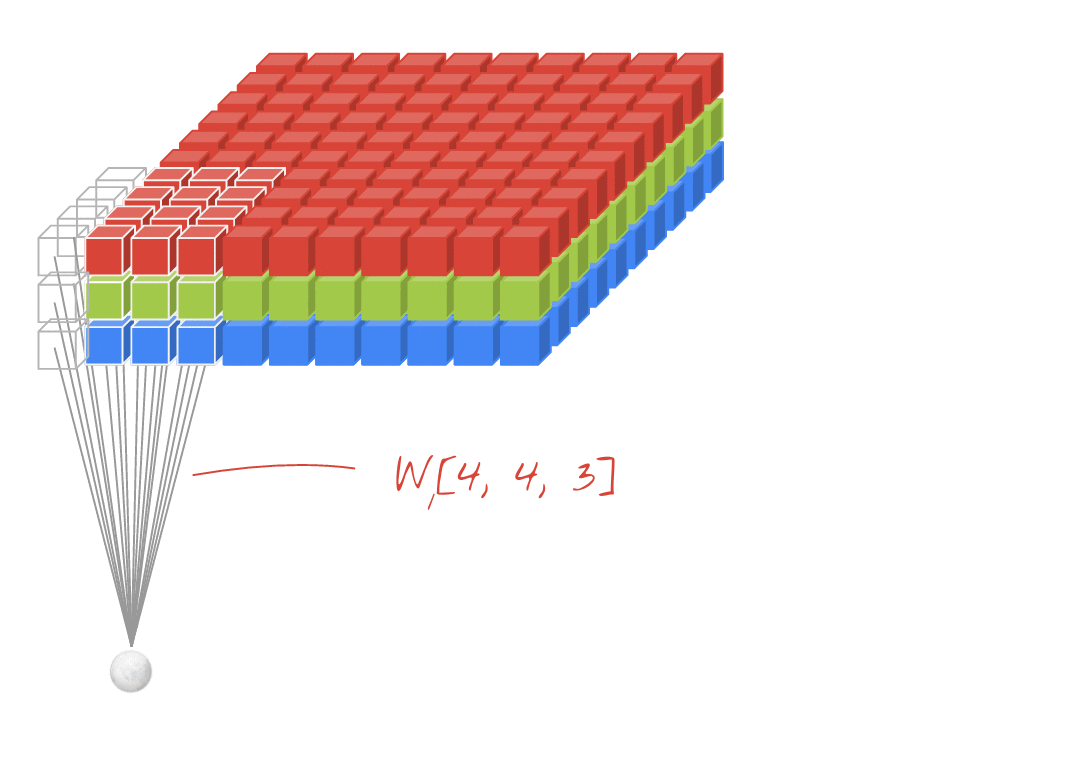

In [5]:
from IPython.display import Image
Image('res/conv.gif', embed=True, width=700)

### Convolutional 

The linear layer is not just a good starting example: it is the fundmental workhorse of all neural networks, so as simple as it is, it is worth examining carefully.

`torch.nn.Linear` implements the function `y = Ax + b`, which takes m-dimensional input `x` and produces n-dimensional output `y`, by multiplying by the n &times; m matrix `A` (whose specific values are called the `weight`) and adding n-dimensional vector `b` (whose values are called the `bias`).  We can make a Linear network with 3d input and 2d output just like this:

In [33]:
import torch
net = torch.nn.Conv2d(
            3, 
            3,
            5
            )
print(net)

Conv2d(3, 3, kernel_size=(5, 5), stride=(1, 1))


In [34]:
net.weight

Parameter containing:
tensor([[[[ 0.0892, -0.0609, -0.0734,  0.0412, -0.0899],
          [-0.1112,  0.0903, -0.0196,  0.0018,  0.0958],
          [ 0.0583,  0.0350,  0.1084, -0.0014, -0.0546],
          [-0.0776,  0.0024,  0.0490,  0.0677,  0.0347],
          [ 0.0564, -0.0397, -0.0609, -0.1005, -0.0136]],

         [[-0.1088, -0.0995, -0.0916, -0.1125, -0.0626],
          [-0.0367,  0.0213, -0.0839, -0.0550,  0.0763],
          [ 0.0646, -0.0279,  0.0955, -0.0265, -0.1005],
          [ 0.1004, -0.0608,  0.0602, -0.0869,  0.0359],
          [ 0.0749,  0.0342, -0.0017, -0.0195, -0.0475]],

         [[ 0.0742,  0.0363,  0.1140,  0.0493,  0.0970],
          [-0.0334, -0.0982, -0.0273,  0.0487, -0.0215],
          [-0.0567,  0.1086, -0.0023,  0.0938, -0.1097],
          [ 0.0342, -0.0088, -0.0007,  0.0367,  0.1005],
          [-0.0751, -0.1084, -0.0363, -0.0770,  0.0715]]],


        [[[-0.0573, -0.0853,  0.0566,  0.0741,  0.0201],
          [-0.1055, -0.0971, -0.0371, -0.0659,  0.0242],
 

In [37]:
import numpy as np
from itertools import product
from matplotlib import pyplot as plt

def plot_conv_weights(layer, figsize=(4, 4)):
    W = layer
    shape = W.shape
    nrows = np.ceil(np.sqrt(shape[0])).astype(int)
    ncols = nrows

    for feature_map in range(shape[1]):
        figs, axes = plt.subplots(nrows, ncols, figsize=figsize, squeeze=False)

        for ax in axes.flatten():
            ax.set_xticks([])
            ax.set_yticks([])
            ax.axis('off')

        for i, (r, c) in enumerate(product(range(nrows), range(ncols))):
            if i >= shape[0]:
                break
            axes[r, c].imshow(W[i, feature_map], cmap='gray',
                              interpolation='none')


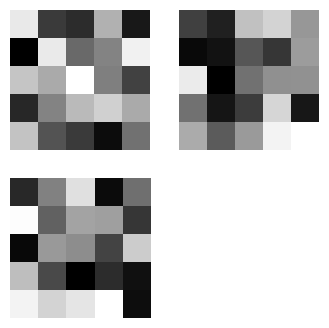

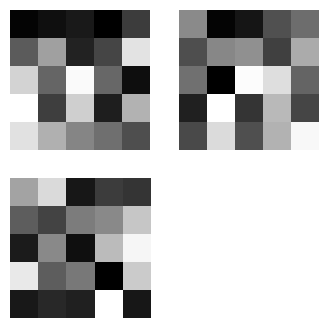

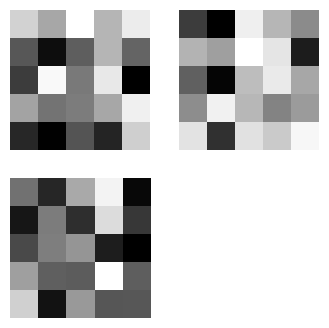

In [38]:
# net = torch.nn.Conv2d(
#         3, 
#         3,
#         2
#     )

plot_conv_weights(net.weight.detach().numpy())

In [54]:
def plot_conv_activity(layer, x, figsize=(6, 8)):
    chnnels = ['Red', 'Green', 'Blue']
    activity = layer(x).detach().numpy()
    figs, axes = plt.subplots(2, 3, figsize=(10,10), squeeze=False)
    for i in range(3):
        axes[0, i ].imshow(1 - x[i], cmap='gray',
                                interpolation='none')
        axes[0, i].set_title(chnnels[i]+' Chnnel')
        axes[1, i ].imshow(1 - activity[i], cmap='gray',
                                interpolation='none')
        axes[1, i].set_title('Filtered')
        
    return plt

<module 'matplotlib.pyplot' from '/home/fawad/anaconda3/envs/torch/lib/python3.8/site-packages/matplotlib/pyplot.py'>

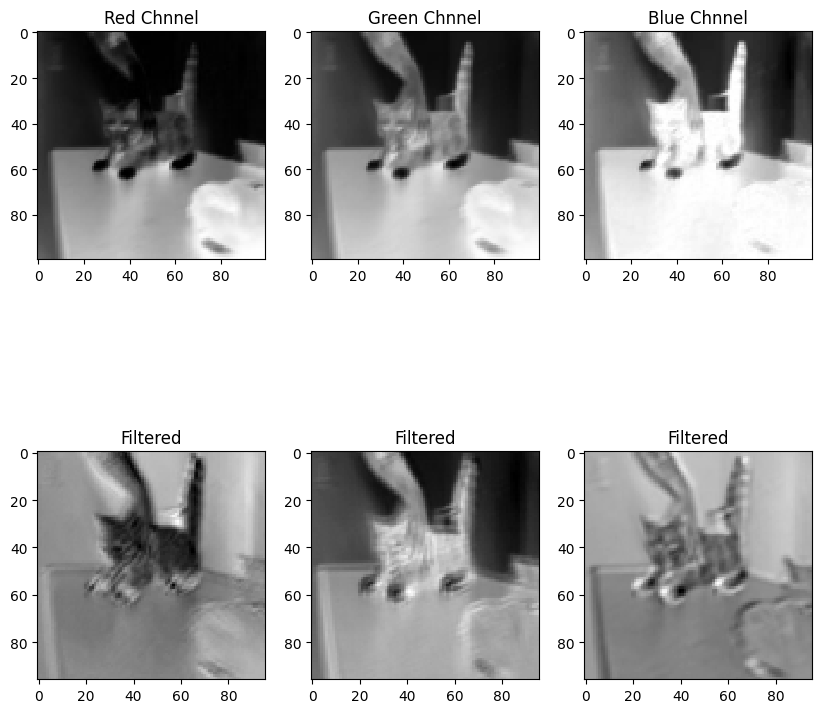

In [55]:
import torchvision
import torchvision.transforms as transforms
transform = transforms.Compose(
    [transforms.Resize((100,100)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, ), (0.5, ))])
trainset = torchvision.datasets.ImageFolder(root='res/dataset_dir/cat_dog/train', transform=transform)

img = trainset[0]
plot_conv_activity(net, img[0])


### Custom CNN Model

In [39]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np


transform = transforms.Compose(
    [transforms.Resize((300,300)),
    transforms.Grayscale(num_output_channels=1),
    transforms.ToTensor(),
    transforms.Normalize((0.5, ), (0.5, ))])
data = torchvision.datasets.ImageFolder(root='res/dataset_dir/cat_dog/train', transform=transform)

CLASSES = ['CAT', 'DOG']
NUM_CLASSES = len(CLASSES)
class CNN(nn.Module):
    def __init__(self) -> None:
        super().__init__()
        self.conv1 = nn.Conv2d(1, 6, 3)  
        self.pool = nn.MaxPool2d(2, 2)  
        self.conv2 = nn.Conv2d(6, 16, 3) 
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(16 * 11 * 11, 128) # out: (BS, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, NUM_CLASSES)
        self.relu = nn.ReLU()
        self.softmax = nn.LogSoftmax()
    
    def forward(self, x):
        x = self.conv1(x) # out: (BS, 6, 48, 48)
        x = self.relu(x)
        x = self.pool(x) # out: (BS, 6, 24, 24)
        x = self.conv2(x) # out: (BS, 16, 22, 22)
        x = self.relu(x)
        x = self.pool(x) # out: (BS, 16, 11, 11)
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        x = self.softmax(x)
        return x


In [ ]:
from torch.utils.tensorboard import SummaryWriter
import torch
import numpy as np
writer = SummaryWriter('res/model_zoo/tb/CNN')
net = CNN()
writer.add_graph(net, data[0][0])

## Image Datasets and Dataloaders in pytorch

In [25]:
from IPython.display import Video
Video('res/vids/How_NN_Takes_Input.mp4', embed=True, width=700)

Data sets can be thought of as big arrays of data.  If the data set is small enough (e.g., MNIST, which has 60,000 28x28 grayscale images), a dataset can be literally represented as a single pytorch tensor.  With one number per pixel, MNIST takes about 200 megabytes of RAM, which fits comfortably into a modern computer.

But larger-scale datasets like `CAT DOG (60,000 300x300 RGB images) requiring 15 GB of RAM` or ImageNet have more than a million higher-resolution full-color images.  In these cases, an ordinary python array or pytorch tensor would require more than a terabyte of RAM, which is impractical on most computers.

Instead, we need to load the data from disk (or SSD).  Unfortunately, the latency of loading from disk is very slow compared to RAM, so we need to do the loading cleverly if we want to load the data quickly.

To solve the problem, pytorch provides two classes:
 * `torch.utils.data.Dataset` - This very simple base class represents an array where the actual data may be slow to fetch, typically because the data is in disk files that require some loading, decoding, or other preprocessing. Pytorch provides a variety of different `Dataset` subclasses.  For example, there is a handy one called `ImageFolder` that treats a directory tree of image files as an array of classified images.
 * `torch.utils.data.DataLoader` - This fancy class wraps a `Dataset` as a stream of data batches.  Behind the scenes it uses a few techniques to feed the data faster.  You do not need to subclass `DataLoader` - its purpose is to make a `Dataset` speedy.

### Build Model

In [24]:
from torch import nn
from torch.nn import functional as F
class CAT_DOG_MODEL_CNN(nn.Module):
    def __init__(self, in_chnnels=3, NUM_CLASSES=2, device='cpu'):
        super(CAT_DOG_MODEL_CNN, self).__init__()
        self.conv1 = nn.Conv2d(in_chnnels, 6, 3)  
        self.pool = nn.MaxPool2d(2, 2)  
        self.conv2 = nn.Conv2d(6, 16, 3) 
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(16 * 148 * 148, 128) # out: (BS, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, NUM_CLASSES)
        self.relu = nn.ReLU()
        self.softmax = nn.LogSoftmax(0)
        self.device = device
    
    def forward(self, x):
        x = self.conv1(x) # out: (BS, 6, 598, 598)
        x = self.relu(x)
        x = self.pool(x) # out: (BS, 6, 299, 299)
        x = self.conv2(x) # out: (BS, 16, 297, 297)
        x = self.relu(x)
        x = self.pool(x) # out: (BS, 16, 148, 148)
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        x = self.softmax(x)
        return x
    
#Lable Transform
class ToCategorical:
    def __init__(self, max_classes, target_device) -> None:
        self.max_classes = max_classes
        self.target_device = target_device

    def __call__(self, lable):
        lable = int(lable)
        categorical = torch.zeros(self.max_classes)
        if lable > self.max_classes:
            raise f'Provided {lable} maps out of class range as max classes are {self.max_classes}'
        categorical[lable] = 1
        return categorical.to(self.target_device)

    def __repr__(self) -> str:
        return f"{self.__class__.__name__}()"

#### Train

In [25]:
import os
import torch
from torch import optim
from tqdm import tqdm
import torchvision
class Train_Cat_DOG():
    def __init__(
            self,
            train_set_path,
            val_set_path,            
            in_shape=(300,300),
            in_chnnels=1, 
            batch_size=32,
            out_size=1, 
            hidden_size=5, 
            hidden_layers=2,
            sched_step=300,
            save_path='./model_zoo',
            device='cpu'
        ) -> None:
        
        # data Transformation
        self.train_transform = torchvision.transforms.Compose([
                # Randomly Flip Image
                torchvision.transforms.RandomHorizontalFlip(),
                torchvision.transforms.RandomVerticalFlip(),
                # Resize Image to Standard Format
                torchvision.transforms.Resize(in_shape),
                # Convert to gray Scale
                torchvision.transforms.Grayscale(),
                # Convert Data To tensor form
                torchvision.transforms.ToTensor(),
                # Normalize data to Zero Mean 
                torchvision.transforms.Normalize(
                    mean=[0.4572],
                    std=[0.0197]
                )
            ])
        self.val_transform = torchvision.transforms.Compose([
                # Resize Image to Standard Format
                torchvision.transforms.Resize(in_shape),
                # Convert to gray Scale
                torchvision.transforms.Grayscale(),
                # Convert Data To tensor form
                torchvision.transforms.ToTensor(),
                # Normalize data to Average Mean
                torchvision.transforms.Normalize(
                    mean=[0.4659],
                    std=[0.0197]
                )
            ])
        
        #Lable Transform
        self.target_transform = torchvision.transforms.Compose([
                # Convert Data to categorical form
                # i.e cat: 0 => [1,0], dog: 1 => [0,1]
                ToCategorical(2, target_device=device),
            ])
        self.batch_size = batch_size
        ## Training Data Loader
        train_set =  torchvision.datasets.ImageFolder(
            train_set_path,
            transform=self.train_transform,
            target_transform=self.target_transform
        )
        self.train_loader = torch.utils.data.DataLoader(train_set, batch_size=self.batch_size, shuffle=True)

        ## Validatin Data Loader
        val_set =  torchvision.datasets.ImageFolder(
            val_set_path,
            transform=self.val_transform, 
            target_transform=self.target_transform
        )
        self.val_loader = torch.utils.data.DataLoader(val_set, batch_size=self.batch_size, shuffle=True)
        ## Model
        self.net = CAT_DOG_MODEL_CNN(
                    in_chnnels,
                    out_size,
                    device=device
                )
        
        self.criteron = nn.CrossEntropyLoss()
        self.sched_step = sched_step
        self.save_path = save_path
        if not os.path.exists(self.save_path):
            os.makedirs(self.save_path, exist_ok=True)
        self.device = device
        self.in_shape = in_shape
        
    def train(self, epochs=10, start_epoch=0,lr=0.001, eval_duration=5, save_duration=5, resume=None):
        self.optimizer = optim.Adam(self.net.parameters(), lr=lr)    
            # criteron = lambda x, y: torch.mean(torch.abs(x - y))
            
        self.scheduler = optim.lr_scheduler.StepLR(self.optimizer, step_size=self.sched_step, gamma=0.5)
        if resume:
            pass
        bset_running_loss = 1e100
        bset_val_loss = 1e100
        for epoch in range(start_epoch,epochs,1):
            
            # Train Step
            running_loss = self.train_step(
                epoch
            )
            if running_loss < bset_running_loss:
                bset_running_loss = running_loss 
                self.save_state(
                    epochs, 
                    epoch,
                    self.batch_size,
                    eval_duration,
                    running_loss,
                    name='best.pt'
                )
            if epoch%save_duration==0:
                self.save_state(
                    epochs, 
                    epoch,
                    self.batch_size,
                    eval_duration,
                    running_loss
                )
            if epoch%eval_duration == 0:
                loss = self.eval_step(
                    epoch
                )
        # self.eval_step(
        #     epoch
        # )
    def train_step(self, epoch):
        self.net.train()
        running_loss = self.process_step(self.train_loader)
        print('Train Epoch: {}, Loss: {:.10f}'.format(epoch, running_loss))
        self.scheduler.step()
        return running_loss
    @torch.no_grad()
    def eval_step(self, epoch):
        self.net.train(False)  
        running_loss = self.process_step(self.val_loader)
        print('Val Epoch: {}, Loss: {:.10f}'.format(epoch, running_loss))
        return running_loss
    
    def process_step(self, set):
        is_training = self.net.training
        running_loss = []
        for inputs, labels in tqdm(set):
            # label transform
            # labels = torch.tensor([labels], dtype=torch.float32)[None,:]
            # Forward pass
            inputs = inputs.to(self.device)
            outputs = self.net(inputs)
            # compute average absolute difference between outputs and labels
            loss = self.criteron(outputs, labels)
            # loss = self.criteron(outputs.softmax(0), labels)
            if is_training:
                # Backward pass and optimization
                self.optimizer.zero_grad()
                loss.backward()
                self.optimizer.step()
            running_loss.append(loss.item())
        return sum(running_loss)/len(running_loss)
    
    def save_state(self, epochs, start_epoch, batch_size, eval_duration, running_loss, name=''):
        state = {
            'net':self.net.state_dict(),
            'optimizer':self.optimizer.state_dict(),
            'lr_sec':self.scheduler.state_dict(),
            'save_dir':self.save_path,
            'epochs':epochs,
            'start_epoch':start_epoch,
            'batch_size':batch_size,
            'device':self.device,
            'eval_duration':eval_duration,
            'loss':running_loss
        }
        torch.save(
            state,
            os.path.join(self.save_path, name if name else f'Epoch_{str(start_epoch).zfill(4)}.pth')
        )
    def load_state(self):
        pass  

In [26]:
trainer = Train_Cat_DOG(
            'res/dataset_dir/cat_dog/train',
            'res/dataset_dir/cat_dog/val',
            in_shape=(600,600),
            batch_size=32,
            out_size=2, 
            hidden_size=32, 
            hidden_layers=5,
            sched_step=10,
            save_path='./model_zoo',
            device='cpu'
            )

In [27]:
trainer.train(
    10,0,save_duration=1
)

100%|██████████| 38/38 [01:05<00:00,  1.73s/it]


Train Epoch: 0, Loss: 6.9676610012


100%|██████████| 11/11 [00:04<00:00,  2.49it/s]


Val Epoch: 0, Loss: 2.5774352876


100%|██████████| 38/38 [00:33<00:00,  1.13it/s]


Train Epoch: 1, Loss: 0.9962793189


100%|██████████| 38/38 [00:35<00:00,  1.08it/s]


Train Epoch: 2, Loss: 0.6397817017


100%|██████████| 38/38 [00:34<00:00,  1.11it/s]


Train Epoch: 3, Loss: 0.6229545945


100%|██████████| 38/38 [00:34<00:00,  1.10it/s]


Train Epoch: 4, Loss: 0.6026917367


100%|██████████| 38/38 [00:35<00:00,  1.07it/s]


Train Epoch: 5, Loss: 0.5868031037


100%|██████████| 11/11 [00:04<00:00,  2.35it/s]


Val Epoch: 5, Loss: 0.6980938966


100%|██████████| 38/38 [00:34<00:00,  1.09it/s]


Train Epoch: 6, Loss: 0.5603104296


100%|██████████| 38/38 [00:34<00:00,  1.10it/s]


Train Epoch: 7, Loss: 0.5087234754


100%|██████████| 38/38 [00:35<00:00,  1.08it/s]


Train Epoch: 8, Loss: 0.4721623228


100%|██████████| 38/38 [00:35<00:00,  1.06it/s]


Train Epoch: 9, Loss: 0.4195587902


#### Inference 

In [31]:
import torch
ckpt = torch.load('model_zoo/best.pt')['net']
trainer.net.load_state_dict(ckpt)
trainer.net = trainer.net.train(False)

In [42]:
image, lable = trainer.train_set[-1]
pred = trainer.net(image.to(trainer.net.device))

In [43]:
pred, lable

(tensor([[-23.5380,  33.3939]], device='cuda:0', grad_fn=<AddmmBackward0>),
 tensor([[1., 0.]], device='cuda:0'))

## How model work

In [ ]:
def _plot_heat_map(net, X, figsize, get_heat_image):
    if (X.ndim != 4):
        raise ValueError("This function requires the input data to be of "
                         "shape (b, c, x, y), instead got {}".format(X.shape))

    num_images = X.shape[0]
    if figsize[1] is None:
        figsize = (figsize[0], num_images * figsize[0] / 3)
    figs, axes = plt.subplots(num_images, 3, figsize=figsize)

    for ax in axes.flatten():
        ax.set_xticks([])
        ax.set_yticks([])
        ax.axis('off')

    for n in range(num_images):
        heat_img = get_heat_image(net, X[n:n + 1, :, :, :], n)

        ax = axes if num_images == 1 else axes[n]
        img = X[n, :, :, :].mean(0)
        ax[0].imshow(-img, interpolation='nearest', cmap='gray')
        ax[0].set_title('image')
        ax[1].imshow(-heat_img, interpolation='nearest', cmap='Reds')
        ax[1].set_title('critical parts')
        ax[2].imshow(-img, interpolation='nearest', cmap='gray')
        ax[2].imshow(-heat_img, interpolation='nearest', cmap='Reds',
                     alpha=0.6)
        ax[2].set_title('super-imposed')
    return plt

In [ ]:
def occlusion_heatmap(net, x, target, square_length=7):

    if (x.ndim != 4) or x.shape[0] != 1:
        raise ValueError("This function requires the input data to be of "
                         "shape (1, c, x, y), instead got {}".format(x.shape))
    if square_length % 2 == 0:
        raise ValueError("Square length has to be an odd number, instead "
                         "got {}.".format(square_length))

    num_classes = net.layers_[-1].shape
    img = x[0].copy()
    bs, col, s0, s1 = x.shape

    heat_array = np.zeros((s0, s1))
    pad = square_length // 2 + 1
    x_occluded = np.zeros((s1, col, s0, s1), dtype=img.dtype)
    probs = np.zeros((s0, s1, num_classes))

    # generate occluded images
    for i in range(s0):
        # batch s1 occluded images for faster prediction
        for j in range(s1):
            x_pad = np.pad(img, ((0, 0), (pad, pad), (pad, pad)), 'constant')
            x_pad[:, i:i + square_length, j:j + square_length] = 0.
            x_occluded[j] = x_pad[:, pad:-pad, pad:-pad]
        y_proba = net.predict_proba(x_occluded)
        probs[i] = y_proba.reshape(s1, num_classes)

    # from predicted probabilities, pick only those of target class
    for i in range(s0):
        for j in range(s1):
            heat_array[i, j] = probs[i, j, target]
    return heat_array

In [ ]:
_plot_heat_map(
    net, X, figsize, lambda net, X, n: occlusion_heatmap(
        net, X, target[n], square_length))

## Tips and Advance concepts 👇

# Masked Auto Encoder 

In [ ]:
import sys
import os
import requests

import torch
import numpy as np

import matplotlib.pyplot as plt
from PIL import Image

# check whether run in Colab
if 'google.colab' in sys.modules:
    print('Running in Colab.')
    !pip3 install timm==0.4.5  # 0.3.2 does not work in Colab
    !git clone https://github.com/facebookresearch/mae.git
    sys.path.append('./mae')
else:
    sys.path.append('..')
import models_mae

### Utils

In [ ]:
# define the utils

imagenet_mean = np.array([0.485, 0.456, 0.406])
imagenet_std = np.array([0.229, 0.224, 0.225])

def show_image(image, title=''):
    # image is [H, W, 3]
    assert image.shape[2] == 3
    plt.imshow(torch.clip((image * imagenet_std + imagenet_mean) * 255, 0, 255).int())
    plt.title(title, fontsize=16)
    plt.axis('off')
    return

def prepare_model(chkpt_dir, arch='mae_vit_large_patch16'):
    # build model
    model = getattr(models_mae, arch)()
    # load model
    checkpoint = torch.load(chkpt_dir, map_location='cpu')
    msg = model.load_state_dict(checkpoint['model'], strict=False)
    print(msg)
    return model

def run_one_image(img, model):
    x = torch.tensor(img)

    # make it a batch-like
    x = x.unsqueeze(dim=0)
    x = torch.einsum('nhwc->nchw', x)

    # run MAE
    loss, y, mask = model(x.float(), mask_ratio=0.75)
    y = model.unpatchify(y)
    y = torch.einsum('nchw->nhwc', y).detach().cpu()

    # visualize the mask
    mask = mask.detach()
    mask = mask.unsqueeze(-1).repeat(1, 1, model.patch_embed.patch_size[0]**2 *3)  # (N, H*W, p*p*3)
    mask = model.unpatchify(mask)  # 1 is removing, 0 is keeping
    mask = torch.einsum('nchw->nhwc', mask).detach().cpu()

    x = torch.einsum('nchw->nhwc', x)

    # masked image
    im_masked = x * (1 - mask)

    # MAE reconstruction pasted with visible patches
    im_paste = x * (1 - mask) + y * mask

    # make the plt figure larger
    plt.rcParams['figure.figsize'] = [24, 24]

    plt.subplot(1, 4, 1)
    show_image(x[0], "original")

    plt.subplot(1, 4, 2)
    show_image(im_masked[0], "masked")

    plt.subplot(1, 4, 3)
    show_image(y[0], "reconstruction")

    plt.subplot(1, 4, 4)
    show_image(im_paste[0], "reconstruction + visible")

    plt.show()

In [ ]:
# load an image
img_url = 'https://user-images.githubusercontent.com/11435359/147738734-196fd92f-9260-48d5-ba7e-bf103d29364d.jpg' # fox, from ILSVRC2012_val_00046145
# img_url = 'https://user-images.githubusercontent.com/11435359/147743081-0428eecf-89e5-4e07-8da5-a30fd73cc0ba.jpg' # cucumber, from ILSVRC2012_val_00047851
img = Image.open(requests.get(img_url, stream=True).raw)
img = img.resize((224, 224))
img = np.array(img) / 255.

assert img.shape == (224, 224, 3)

# normalize by ImageNet mean and std
img = img - imagenet_mean
img = img / imagenet_std

plt.rcParams['figure.figsize'] = [5, 5]
show_image(torch.tensor(img))

########################
## LOAD MODEL
########################
# This is an MAE model trained with pixels as targets for visualization (ViT-Large, training mask ratio=0.75)

# download checkpoint if not exist
!wget -nc https://dl.fbaipublicfiles.com/mae/visualize/mae_visualize_vit_large.pth

chkpt_dir = 'mae_visualize_vit_large.pth'
model_mae = prepare_model(chkpt_dir, 'mae_vit_large_patch16')
print('Model loaded.')

In [ ]:
# make random mask reproducible (comment out to make it change)
torch.manual_seed(2)
print('MAE with pixel reconstruction:')
run_one_image(img, model_mae)

# Save and Close

In [ ]:
%%javascript
IPython.notebook.save_checkpoint();
window.onbeforeunload = null
window.close();
IPython.notebook.session.delete();